In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.io import loadmat

import utils

grader = utils.Grader()

In [2]:
data = loadmat('/Users/advaithsai/ml-coursera/ex4/ex4data1.mat')
X = data['X']
y = data['y'].ravel() # making it a single array

y[y==10] = 0
m = y.shape[0] # number of training examples

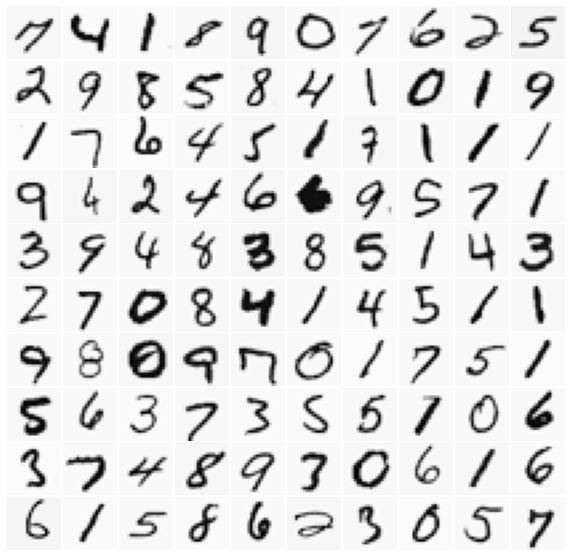

In [0]:
# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

utils.displayData(sel)

In [3]:
input_layer_size = 400 # 20 x 20 pixels
hidden_layer_size = 25 # hidden layers
num_labels = 10 # 10 output labels from 0 to 9

weights = loadmat('/Users/advaithsai/ml-coursera/ex4/ex4weights.mat')

Theta1 = weights['Theta1']
Theta2 = weights['Theta2']
Theta2 = np.roll(Theta2, 1, axis=0)

nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()])

In [4]:
def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))

In [5]:
def nnCostFunction(nn_params,
                   input_layer_size,
                   hidden_layer_size,
                   num_labels,
                   X, y, lambda_=0.0):
  """
  Instructions
    ------------
    You should complete the code by working through the following parts.
    
    - Part 1: Feedforward the neural network and return the cost in the 
              variable J. After implementing Part 1, you can verify that your
              cost function computation is correct by verifying the cost
              computed in the following cell.
    
    - Part 2: Implement the backpropagation algorithm to compute the gradients
              Theta1_grad and Theta2_grad. You should return the partial derivatives of
              the cost function with respect to Theta1 and Theta2 in Theta1_grad and
              Theta2_grad, respectively. After implementing Part 2, you can check
              that your implementation is correct by running checkNNGradients provided
              in the utils.py module.
    
              Note: The vector y passed into the function is a vector of labels
                    containing values from 0..K-1. You need to map this vector into a 
                    binary vector of 1's and 0's to be used with the neural network
                    cost function.
     
              Hint: We recommend implementing backpropagation using a for-loop
                    over the training examples if you are implementing it for the 
                    first time.
    
    - Part 3: Implement regularization with the cost function and gradients.
    
              Hint: You can implement this around the code for
                    backpropagation. That is, you can compute the gradients for
                    the regularization separately and then add them to Theta1_grad
                    and Theta2_grad from Part 2.
    
    Note 
    ----
    We have provided an implementation for the sigmoid function in the file 
    `utils.py` accompanying this assignment.
  """
  Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                      (hidden_layer_size, (input_layer_size + 1)))

  Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                      (num_labels, (hidden_layer_size + 1)))
  m = y.shape[0]
  
  J = 0
  Theta1_grad = np.zeros(Theta1.shape)
  Theta2_grad = np.zeros(Theta2.shape)
  for i in range(m):
    a_1 = np.hstack((np.ones(1),X[i]))
    z_2 = np.dot(Theta1,a_1)
    a_2 = np.hstack((np.ones(1),sigmoid(z_2)))
    z_3 = np.dot(Theta2,a_2)
    a_3 = sigmoid(z_3)

    Y = np.zeros(num_labels)
    Y[int(y[i])] = 1

    delta_3 = a_3 - Y
    delta_2 = np.dot(Theta2[:,1:].T, delta_3)*sigmoidGradient(z_2) # calculating error from each of the terms


    Theta1_grad = Theta1_grad + np.dot(delta_2.reshape(delta_2.shape[0],1), 
                                       a_1.reshape(a_1.shape[0],1).T)
    Theta2_grad = Theta2_grad + np.dot(delta_3.reshape(delta_3.shape[0],1), 
                                       a_2.reshape(a_2.shape[0],1).T)
    J += np.sum(-Y*np.log(a_3) -(1-Y)*np.log(1-a_3)) 

  J = J/m + (lambda_/(2*m))*(np.sum(Theta1[:,1:]**2)+np.sum(Theta2[:,1:]**2))


  Theta1_grad = np.hstack( ((1/m)*Theta1_grad[:,0:1], 
                   (1/m)*(Theta1_grad[:,1:] + lambda_*Theta1[:,1:])))
  Theta2_grad = np.hstack( ((1/m)*Theta2_grad[:,0:1], 
                   (1/m)*(Theta2_grad[:,1:] + lambda_*Theta2[:,1:])))
  grad = np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel()])
  return J,grad

In [8]:
lambda_ = 0
J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                   num_labels, X, y, lambda_)
print('Cost at parameters (loaded from ex4weights): %.6f ' % J)
print('The cost should be about                   : 0.287629.')

Cost at parameters (loaded from ex4weights): 0.287629 
The cost should be about                   : 0.287629.


In [0]:
grader = utils.Grader()
grader[1] = nnCostFunction
grader.grade()


Submitting Solutions | Programming Exercise neural-network-learning

Use token from last successful submission (advaith.maddipatla@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
              Feedforward and Cost Function |  30 /  30 | Nice work!
                  Regularized Cost Function |   0 /  15 | 
                           Sigmoid Gradient |   0 /   5 | 
  Neural Network Gradient (Backpropagation) |   0 /  40 | 
                       Regularized Gradient |   0 /  10 | 
                                  --------------------------------
                                            |  30 / 100 |  



In [0]:
# Weight regularization parameter (we set this to 1 here).
lambda_ = 1
J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                      num_labels, X, y, lambda_)

print('Cost at parameters (loaded from ex4weights): %.6f' % J)
print('This value should be about                 : 0.383770.')

Cost at parameters (loaded from ex4weights): 0.383770
This value should be about                 : 0.383770.


In [0]:
grader[2] = nnCostFunction
grader.grade()


Submitting Solutions | Programming Exercise neural-network-learning

Use token from last successful submission (advaith.maddipatla@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
              Feedforward and Cost Function |  30 /  30 | Nice work!
                  Regularized Cost Function |  15 /  15 | Nice work!
                           Sigmoid Gradient |   0 /   5 | 
  Neural Network Gradient (Backpropagation) |   0 /  40 | 
                       Regularized Gradient |   0 /  10 | 
                                  --------------------------------
                                            |  45 / 100 |  



In [7]:
def sigmoidGradient(z):
  g = np.zeros(z.shape)

  g = sigmoid(z)*(1-sigmoid(z))
  return g

In [0]:
z = np.array([-1, -0.5, 0, 0.5, 1])
g = sigmoidGradient(z)
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ')
print(g)

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]


In [0]:
grader[3] = sigmoidGradient
grader.grade()


Submitting Solutions | Programming Exercise neural-network-learning

Use token from last successful submission (advaith.maddipatla@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
              Feedforward and Cost Function |  30 /  30 | Nice work!
                  Regularized Cost Function |  15 /  15 | Nice work!
                           Sigmoid Gradient |   5 /   5 | Nice work!
  Neural Network Gradient (Backpropagation) |   0 /  40 | 
                       Regularized Gradient |   0 /  10 | 
                                  --------------------------------
                                            |  50 / 100 |  



In [0]:
def randInitializeWeights(L_in, L_out, epsilon_init=0.12):
  W = np.zeros((L_out, 1 + L_in))
  W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
  return W

In [0]:
print('Initializing Neural Network Parameters ...')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)
# Unroll parameters
initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)

Initializing Neural Network Parameters ...


In [0]:
utils.checkNNGradients(nnCostFunction)

In [0]:
grader[4] = nnCostFunction
grader.grade()


Submitting Solutions | Programming Exercise neural-network-learning

Use token from last successful submission (advaith.maddipatla@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
              Feedforward and Cost Function |  30 /  30 | Nice work!
                  Regularized Cost Function |  15 /  15 | Nice work!
                           Sigmoid Gradient |   5 /   5 | Nice work!
  Neural Network Gradient (Backpropagation) |  40 /  40 | Nice work!
                       Regularized Gradient |   0 /  10 | 
                                  --------------------------------
                                            |  90 / 100 |  



In [0]:
#  Check gradients by running checkNNGradients
lambda_ = 3
utils.checkNNGradients(nnCostFunction, lambda_)

# Also output the costFunction debugging values
debug_J, _  = nnCostFunction(nn_params, input_layer_size,
                          hidden_layer_size, num_labels, X, y, lambda_)
  
print('\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f ' % (lambda_, debug_J))
print('(for lambda = 3, this value should be about 0.576051)')

[[-9.27825235e-03 -9.27825236e-03]
 [-1.67679797e-02 -1.67679797e-02]
 [-6.01744725e-02 -6.01744725e-02]
 [-1.73704651e-02 -1.73704651e-02]
 [ 8.89911959e-03  8.89911960e-03]
 [ 3.94334829e-02  3.94334829e-02]
 [-3.19612287e-02 -3.19612287e-02]
 [-5.75658668e-02 -5.75658668e-02]
 [-8.36010761e-03 -8.36010762e-03]
 [ 5.93355565e-02  5.93355565e-02]
 [ 2.49225535e-02  2.49225535e-02]
 [-4.51963845e-02 -4.51963845e-02]
 [ 7.62813551e-03  7.62813551e-03]
 [ 2.47640974e-02  2.47640974e-02]
 [ 5.97717617e-02  5.97717617e-02]
 [ 9.14587966e-03  9.14587966e-03]
 [-6.74798369e-03 -6.74798370e-03]
 [-3.26881426e-02 -3.26881426e-02]
 [ 3.86410548e-02  3.86410548e-02]
 [ 5.46101547e-02  5.46101547e-02]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.18682669e-01  1.18682669e-01]
 [ 2.03987128e-01  2.03987128e-01]
 [ 1.25698067e-01  1.25698067e-01]
 [ 1.76337550e-01  1.76337550e-01]
 [ 1.32294136e-01  1.32294136e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 3.81928666e-05  3.81928696e-05]
 [ 1.17148233e-01  1

In [0]:
grader[5] = nnCostFunction
grader.grade()


Submitting Solutions | Programming Exercise neural-network-learning

Use token from last successful submission (advaith.maddipatla@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
              Feedforward and Cost Function |  30 /  30 | Nice work!
                  Regularized Cost Function |  15 /  15 | Nice work!
                           Sigmoid Gradient |   5 /   5 | Nice work!
  Neural Network Gradient (Backpropagation) |  40 /  40 | Nice work!
                       Regularized Gradient |  10 /  10 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  



In [0]:
#  After you have completed the assignment, change the maxiter to a larger
#  value to see how more training helps.
options= {'maxiter': 100}

#  You should also try different values of lambda
lambda_ = 1

# Create "short hand" for the cost function to be minimized
costFunction = lambda p: nnCostFunction(p, input_layer_size,
                                        hidden_layer_size,
                                        num_labels, X, y, lambda_)

# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)
res = optimize.minimize(costFunction,
                        initial_nn_params,
                        jac=True,
                        method='TNC',
                        options=options)

# get the solution of the optimization
nn_params = res.x
        
# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                    (hidden_layer_size, (input_layer_size + 1)))

Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                    (num_labels, (hidden_layer_size + 1)))

In [0]:
pred = utils.predict(Theta1, Theta2, X)
print('Training Set Accuracy: %f' % (np.mean(pred == y) * 100))

Training Set Accuracy: 95.600000


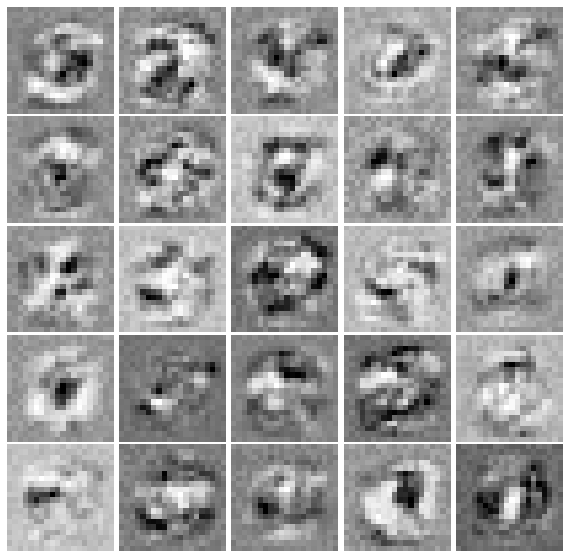

In [0]:
utils.displayData(Theta1[:, 1:])